In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.float_format', lambda x: '%.2f' % x)

Analisis descriptivo

In [4]:
categorical = [
    "Car", "Car_desc", "Jur", "Jur_desc", "Sjur", "Sjur_desc", "Ent", "Ent_desc", "Og", "Og_desc", "UE", "UE_desc", "Prog", "Prog_desc", "Sprog", "Sprog_desc", "Proy", "Proy_desc", "Actividad", "Act_desc", "Ob", "ob_desc", "Fin", "Fin_desc", "Fun", "Fun_desc", "Inc", "Inc_desc", "Ppal", "Ppal_desc", "Par", "Par_desc", "Spar", "Spar_desc", "Eco", "Eco_desc", "Fte", "Fte_desc", "Geo", "Geo_desc",
]

categoricalIds = list(
    filter(lambda text: not text.endswith("_desc"), categorical))
categoricalDesc = list(
    filter(lambda text: text.endswith("_desc"), categorical))

nonCategorical = [
    "Sanción", "Vigente", "Definitivo", "Devengado"
]

types = {var: "category" for var in categorical}

data = pd.read_csv("dataset.csv", dtype=types)

In [35]:
null_data = data[data.isnull().any(axis=1)]
null_data
# no hay datos faltantes, testeado para strings y números en blanco, es decir "foo,,bar" en el csv

,Car,Car_desc,Jur,Jur_desc,Sjur,Sjur_desc,Ent,Ent_desc,Og,Og_desc,...,Eco,Eco_desc,Fte,Fte_desc,Geo,Geo_desc,Sanción,Vigente,Definitivo,Devengado


Jerarquías

In [27]:
id_description_list = [["Car", "Car_desc"], ["Jur", "Jur_desc"], ["Sjur", "Sjur_desc"], ["Ent", "Ent_desc"], ["Og", "Og_desc"], ["UE", "UE_desc"], ["Prog", "Prog_desc"], ["Sprog", "Sprog_desc"], ["Proy", "Proy_desc"], ["Actividad", "Act_desc"], ["Ob", "ob_desc"], ["Fin", "Fin_desc"], ["Fun", "Fun_desc"], ["Inc", "Inc_desc"], ["Ppal", "Ppal_desc"], ["Par", "Par_desc"], ["Spar", "Spar_desc"], ["Eco", "Eco_desc"], ["Fte", "Fte_desc"], ["Geo", "Geo_desc"]]

In [28]:
id_description_list

[['Car', 'Car_desc'],
 ['Jur', 'Jur_desc'],
 ['Sjur', 'Sjur_desc'],
 ['Ent', 'Ent_desc'],
 ['Og', 'Og_desc'],
 ['UE', 'UE_desc'],
 ['Prog', 'Prog_desc'],
 ['Sprog', 'Sprog_desc'],
 ['Proy', 'Proy_desc'],
 ['Actividad', 'Act_desc'],
 ['Ob', 'ob_desc'],
 ['Fin', 'Fin_desc'],
 ['Fun', 'Fun_desc'],
 ['Inc', 'Inc_desc'],
 ['Ppal', 'Ppal_desc'],
 ['Par', 'Par_desc'],
 ['Spar', 'Spar_desc'],
 ['Eco', 'Eco_desc'],
 ['Fte', 'Fte_desc'],
 ['Geo', 'Geo_desc']]

In [41]:
id_description_values = []

for id_description in id_description_list:
    id_description_values.append(id_description[0])
    id_description_values.append(set(zip(data[id_description[0]], data[id_description[1]])))
    id_description_values.append("--------------")

In [42]:
id_description_values

['Car',
 {('1', 'Administracion Central'), ('2', 'Organismos Descentralizados')},
 '--------------',
 'Jur',
 {('1', 'Legislatura De La Ciudad De Buenos Aires'),
  ('2', 'Auditoria General De La Ciudad De Buenos Aires'),
  ('20', 'Jefatura De Gobierno'),
  ('21', 'Jefatura De Gabinete De Ministros'),
  ('26', 'Ministerio De Justicia Y Seguridad'),
  ('28', 'Ministerio De Gobierno'),
  ('3', 'Defensoria Del Pueblo'),
  ('30', 'Ministerio De Desarrollo Urbano Y Transporte'),
  ('35', 'Ministerio De Ambiente Y Espacio Publico'),
  ('40', 'Ministerio De Salud'),
  ('45', 'Min.H\xc3\xa0bitat Y Des. Humano'),
  ('5', 'Ministerio Publico'),
  ('50', 'Ministerio De Cultura'),
  ('55', 'Ministerio De Educacion'),
  ('6', 'Tribunal Superior De Justicia'),
  ('60', 'Ministerio De Hacienda'),
  ('65', 'Min.Modern.Innovacion Y Tecnologia'),
  ('7', 'Consejo De La Magistratura'),
  ('8', 'Sindicatura General De La Ciudad De Buenos Aires'),
  ('9', 'Procuracion General  De La Ciudad'),
  ('98', 'Serv

In [77]:
data[["Jur","Jur_desc","Sjur","Sjur_desc"]].drop_duplicates().to_csv("jur_sjur")

In [79]:
data[["Jur","Jur_desc"]].drop_duplicates().count()

Jur         22
Jur_desc    22
dtype: int64

In [82]:
data[["Sjur","Sjur_desc"]].drop_duplicates().count()

Sjur         29
Sjur_desc    29
dtype: int64

In [85]:
data[["Sjur"]].drop_duplicates().count()


Sjur    8
dtype: int64

In [86]:
data[["Sjur_desc"]].drop_duplicates().count()


Sjur_desc    29
dtype: int64

In [81]:
data[["Sjur","Sjur_desc"]].drop_duplicates()

,Sjur,Sjur_desc
0,0,Legislatura De La Ciudad De Buenos Aires
75,0,Jefatura De Gobierno
512,21,Vicejefatura De Gobierno
1860,22,Sec.Gral. Y Realaciones Internacionales
2534,24,Secretaria Legal Y Tecnica
2975,29,Secretaria De Medios
3425,0,Jefatura De Gabinete De Ministros
5383,0,Ministerio De Justicia Y Seguridad
7219,26,Plan De Seguridad Publica
9014,0,Ministerio De Gobierno


In [70]:
data[["Sjur","Jur_desc","Sjur","Sjur_desc", "Ent", "Ent_desc"]].drop_duplicates()

,Jur,Jur_desc,Sjur,Sjur_desc,Ent,Ent_desc
0,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires
75,20,Jefatura De Gobierno,0,Jefatura De Gobierno,0,Jefatura De Gobierno
512,20,Jefatura De Gobierno,21,Vicejefatura De Gobierno,0,Vicejefatura De Gobierno
1860,20,Jefatura De Gobierno,22,Sec.Gral. Y Realaciones Internacionales,0,Sec.Gral. Y Realaciones Internacionales
2534,20,Jefatura De Gobierno,24,Secretaria Legal Y Tecnica,0,Secretaria Legal Y Tecnica
2975,20,Jefatura De Gobierno,29,Secretaria De Medios,0,Secretaria De Medios
3425,21,Jefatura De Gabinete De Ministros,0,Jefatura De Gabinete De Ministros,0,Jefatura De Gabinete De Ministros
5383,26,Ministerio De Justicia Y Seguridad,0,Ministerio De Justicia Y Seguridad,0,Ministerio De Justicia Y Seguridad
7219,26,Ministerio De Justicia Y Seguridad,26,Plan De Seguridad Publica,0,Plan De Seguridad Publica
9014,28,Ministerio De Gobierno,0,Ministerio De Gobierno,0,Ministerio De Gobierno


In [69]:
data[["Jur", "Jur_desc","Geo","Geo_desc"]].drop_duplicates()

,Jur,Jur_desc,Geo,Geo_desc
0,1,Legislatura De La Ciudad De Buenos Aires,1,Comuna 1
75,20,Jefatura De Gobierno,4,Comuna 4
596,20,Jefatura De Gobierno,1,Comuna 1
624,20,Jefatura De Gobierno,14,Comuna 14
671,20,Jefatura De Gobierno,3,Comuna 3
971,20,Jefatura De Gobierno,13,Comuna 13
1223,20,Jefatura De Gobierno,10,Comuna 10
1224,20,Jefatura De Gobierno,11,Comuna 11
1225,20,Jefatura De Gobierno,12,Comuna 12
1226,20,Jefatura De Gobierno,15,Comuna 15


In [63]:
data[["Fin","Fin_desc","Eco","Eco_desc"]].drop_duplicates()

,Fin,Fin_desc,Eco,Eco_desc
0,1,Administración Gubernamental,21200000,Remuneraciones Al Personal
8,1,Administración Gubernamental,21310000,Bienes De Consumo
29,1,Administración Gubernamental,21320000,Servicios No Personales
63,1,Administración Gubernamental,22140000,Maquinaria Y Equipo
71,1,Administración Gubernamental,22190000,Activos Intangibles
72,1,Administración Gubernamental,21710000,Al Sector Privado
73,1,Administración Gubernamental,22120000,Construcciones Del Dominio Privado
512,3,Servicios Sociales,21200000,Remuneraciones Al Personal
522,3,Servicios Sociales,21320000,Servicios No Personales
530,3,Servicios Sociales,21310000,Bienes De Consumo


In [66]:
data[["Og","Og_desc","Fin","Fin_desc"]].drop_duplicates()

,Og,Og_desc,Fin,Fin_desc
0,1,Legislatura De La Ciudad De Buenos Aires,1,Administración Gubernamental
75,20,Jefatura De Gobierno,1,Administración Gubernamental
512,218,Vicejefatura De Gobierno,3,Servicios Sociales
1150,218,Vicejefatura De Gobierno,4,Servicios Económicos
1496,218,Vicejefatura De Gobierno,1,Administración Gubernamental
1860,220,Sec.Gral. Y Realaciones Internacionales,1,Administración Gubernamental
2383,220,Sec.Gral. Y Realaciones Internacionales,3,Servicios Sociales
2533,220,Sec.Gral. Y Realaciones Internacionales,2,Servicios De Seguridad
2534,240,Secretaria Legal Y Tecnica,1,Administración Gubernamental
2684,240,Secretaria Legal Y Tecnica,3,Servicios Sociales


In [91]:
data[["Fin","Fin_desc","Fun","Fun_desc","Inc","Inc_desc","Ppal","Ppal_desc", "Par", "Par_desc", "Spar", "Spar_desc"]].drop_duplicates()

,Fin,Fin_desc,Fun,Fun_desc,Inc,Inc_desc,Ppal,Ppal_desc,Par,Par_desc,Spar,Spar_desc
0,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,1,Retribución Del Cargo,0,Retribución Del Cargo
1,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,4,Sueldo Anual Complementario,0,Sueldo Anual Complementario
2,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,6,Contribuciones Patronales,0,Contribuciones Patronales
3,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,2,Personal Transitorio,1,Retribución Del Cargo,0,Retribución Del Cargo
4,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,2,Personal Transitorio,4,Sueldo Anual Complementario,0,Sueldo Anual Complementario
5,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,2,Personal Transitorio,6,Contribuciones Patronales,0,Contribuciones Patronales
6,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,4,Asignaciones Familiares,1,Personal Permanente,0,Personal Permanente
7,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,6,Beneficios Y Compensaciones,9,Beneficios Y Compensaciones Sin Discriminar,0,Beneficios Y Compensaciones Sin Discriminar
8,1,Administración Gubernamental,1,Legislativa,2,Bienes De Consumo,1,"Productos Alimenticios, Agropecuarios Y Forest...",1,Alimentos Para Personas,0,Alimentos Para Personas
9,1,Administración Gubernamental,1,Legislativa,2,Bienes De Consumo,1,"Productos Alimenticios, Agropecuarios Y Forest...",5,"Madera, Corcho Y Sus Manufacturas",0,"Madera, Corcho Y Sus Manufacturas"


In [45]:
set(zip(data["Jur"], data["Jur_desc"], data["Sjur"], data["Sjur_desc"]))

{('1',
  'Legislatura De La Ciudad De Buenos Aires',
  '0',
  'Legislatura De La Ciudad De Buenos Aires'),
 ('2',
  'Auditoria General De La Ciudad De Buenos Aires',
  '0',
  'Auditoria General De La Ciudad De Buenos Aires'),
 ('20', 'Jefatura De Gobierno', '0', 'Jefatura De Gobierno'),
 ('20', 'Jefatura De Gobierno', '21', 'Vicejefatura De Gobierno'),
 ('20',
  'Jefatura De Gobierno',
  '22',
  'Sec.Gral. Y Realaciones Internacionales'),
 ('20', 'Jefatura De Gobierno', '24', 'Secretaria Legal Y Tecnica'),
 ('20', 'Jefatura De Gobierno', '27', 'Organismos Descentralizados'),
 ('20', 'Jefatura De Gobierno', '29', 'Secretaria De Medios'),
 ('21',
  'Jefatura De Gabinete De Ministros',
  '0',
  'Jefatura De Gabinete De Ministros'),
 ('26',
  'Ministerio De Justicia Y Seguridad',
  '0',
  'Ministerio De Justicia Y Seguridad'),
 ('26',
  'Ministerio De Justicia Y Seguridad',
  '26',
  'Plan De Seguridad  Publica'),
 ('28', 'Ministerio De Gobierno', '0', 'Ministerio De Gobierno'),
 ('3', 'De

In [ ]:
set(zip(data["Jur"], data["Jur_desc"], data["Sjur"], data["Sjur_desc"]))

In [12]:
for cat in categorical:
    print(cat)
    print(data[cat].unique())
    print("-----------------")

Car
[1, 2]
Categories (2, object): [1, 2]
-----------------
Car_desc
[Administracion Central, Organismos Descentralizados]
Categories (2, object): [Administracion Central, Organismos Descentralizados]
-----------------
Jur
[1, 20, 21, 26, 28, ..., 98, 99, 2, 3, 8]
Length: 22
Categories (22, object): [1, 20, 21, 26, ..., 99, 2, 3, 8]
-----------------
Jur_desc
[Legislatura De La Ciudad De Buenos Aires, Jefatura De Gobierno, Jefatura De Gabinete De Ministros, Ministerio De Justicia Y Seguridad, Ministerio De Gobierno, ..., Servicio De La Deuda Publica, Obligaciones A Cargo Del Tesoro, Auditoria General De La Ciudad De Buenos Aires, Defensoria Del Pueblo, Sindicatura General De La Ciudad De Buenos Aires]
Length: 22
Categories (22, object): [Legislatura De La Ciudad De Buenos Aires, Jefatura De Gobierno, Jefatura De Gabinete De Ministros, Ministerio De Justicia Y Seguridad, ..., Obligaciones A Cargo Del Tesoro, Auditoria General De La Ciudad De Buenos Aires, Defensoria Del Pueblo, Sindicat

In [114]:
# Generar tablitas de cuantas descripciones tiene un id, sin tener en cuenta si está dentro de una
# jerarquía diferente
variables = zip(categoricalIds, categoricalDesc)
for (var, desc) in variables:
    counts = data[[var, desc]].drop_duplicates().groupby(var).size().reset_index()
    filtered = counts[counts[0] > 1]
    if not filtered.empty:
        # todo: make this crossplatform (?)
        # filtered.to_csv("tablas/"+var+".csv", index=False, header=False)
        print(filtered)

  Sjur   0
0    0  22
  Ent   0
0   0  28
    Prog   0
0      1  18
1     10   6
2     11  10
3     12   6
4     14   7
..   ...  ..
95    63   5
97    91   3
98   100   2
99   102   2
107   88   2

[99 rows x 2 columns]
   Sprog    0
0      0  504
1      1    2
12     2    3
23     3    2
34     4    2
39     5    2
   Proy    0
0     0  543
1     1   75
2     2   27
3     3   17
4     4   11
5     5    4
6    52    2
9     6    3
10   60   12
11   61   12
12   62    7
13   68    2
14   69    2
15    7    2
18   72    2
20    8    2
21    9    2
24   10    2
25   11    2
26   17    2
29   63    2
30   65   33
31   66    4
42   51    2
    Actividad    0
0           0  231
1        1000   33
2       10000  339
3       10101   64
4       10102   43
..        ...  ...
166     10143    2
180     11131    2
182     11143    2
197     16101    3
201      2104    2

[101 rows x 2 columns]
    Ob     0
0    0  1426
1   51   141
2   52    47
3   53    43
4   54    30
5   55    24
6   56    34


In [56]:
# función que chequea si subvar y subvardesc son consistentes adentro de la jerarquía de "supervar"
# es decir, chequea si hay id's repetidos pero con distinta descripción pero mirando solo localmente
# para cada grupo de "supervar" (a diferencia de las tablas generadas arriba)
# obviamente no prueba que sea una subcategoría (cualquier variable globalmente consistente da true)
# solamente sirve para descartar la posibilidad de inconsistencias tras analizar la tabla de arriba
# es decir, si un id tiene más de una definición mirado globalmente, pero subcategorizándolo tiene una única 
# entonces está todo ok y es una subcategoría (pero no necesariamente es la mínima supercategoría)
def check_consistency_under_category(subvar, subvardesc, supervar):
    triplets = data[[subvar, subvardesc, supervar]].drop_duplicates()
    result = True
    # para cada grupo de la supercategoría(j), 
    # chequear si hay la misma cantidad de id's diferentes y descripciones diferentes
    for j in triplets[supervar].unique():
        df = triplets[triplets[supervar] == j]
        equals = df[subvar].unique().size == df[subvardesc].unique().size
        result = result and equals
    return result


In [116]:
check_consistency_under_category("Sjur", "Sjur_desc", "Jur")

True

In [120]:
check_consistency_under_category("Ppal", "Ppal_desc", "Inc")

True

In [57]:
check_consistency_under_category("Fun", "Fun_desc", "Fin")

True

In [60]:
check_consistency_under_category("Inc", "Inc_desc", "Fun")

True

In [8]:
data[categoricalIds].describe()

,Car,Jur,Sjur,Ent,Og,UE,Prog,Sprog,Proy,Actividad,Ob,Fin,Fun,Inc,Ppal,Par,Spar,Eco,Fte,Geo
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801
unique,2,22,8,32,59,345,108,44,46,211,50,5,9,7,9,9,129,27,7,16
top,1,55,0,0,55,561,1,0,0,1000,0,3,2,1,1,1,0,21200000,11,1
freq,40450,7636,42638,40886,7636,3825,2655,43864,46609,10932,46722,23214,10891,16859,10524,12451,47451,16859,42906,18187


In [88]:
pd.crosstab(data["Jur"], data["Sjur"]).to_csv("crosstab_jur_sjur.csv")

In [9]:
pd.crosstab(data["Jur"], data["Sjur"])

Sjur,0,21,22,24,26,27,29,35
Jur,,,,,,,,
1,75,0,0,0,0,0,0,0
2,63,0,0,0,0,0,0,0
20,437,1348,935,441,0,813,450,0
21,4727,0,0,0,0,0,0,0
26,2622,0,0,0,1880,0,0,0
28,1363,0,0,0,0,0,0,0
3,194,0,0,0,0,0,0,0
30,2906,0,0,0,0,0,0,0
35,4861,0,0,0,0,0,0,296


In [227]:
data[nonCategorical].describe()

,Sanción,Vigente,Definitivo,Devengado
count,48801.00,48801.00,48801.00,48801.00
mean,4565606.60,4660883.41,2406347.50,2081568.95
std,43003433.61,54857115.92,46065419.98,45597285.78
min,0.00,0.00,0.00,0.00
25%,0.00,7600.00,0.00,0.00
50%,41000.00,84816.00,9170.00,6179.34
75%,550000.00,845000.00,273456.40,222314.36
max,4008702080.00,7952610958.00,7952610957.70,7952610957.70


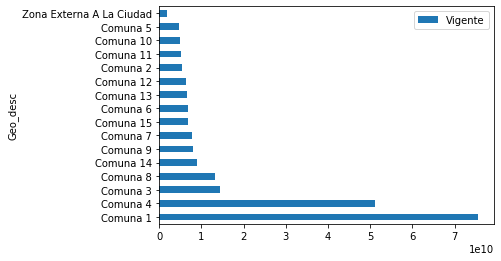

In [224]:
# Análisis bivariado categorica - numérica
x = 'Geo_desc'
y = 'Vigente'
data[[x, y]].groupby(x).sum().sort_values(y, ascending=False).plot.barh()
plt.savefig("Geo_desc-Vigente.png", bbox_inches='tight')
# Total Vigente por Geo_desc

In [79]:
# take two variables and make a dispersion plot with a linear fit on top
def dispersion_graph(x, y, limit_quantile = 1.0, save_img = False):
    data[nonCategorical].plot.scatter(x, y)
    plt.xlim(0, data[x].quantile(limit_quantile))
    plt.ylim(0, data[y].quantile(limit_quantile))
    t = np.arange(0., float(data[x].max()), 1000)
    (a, b) = np.polyfit(data[x], data[y], 1)
    plt.plot(t, (t * a) + b, color="red", label="linear fit")
    if save_img:
        plt.savefig(x+y+"dispersion_graph.png")
    plt.show()

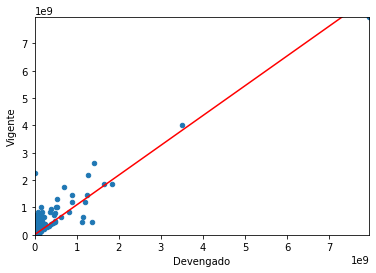

In [183]:
dispersion_graph("Devengado", "Vigente", save_img = True, limit_quantile = 1.00) # correlation: 0.71 (low)
# comentario: me da la impresión de que la correlación es baja porque hay muchos puntos donde uno vale 0
# y el otro no.
# Principalmente porque parece bastante lineal en grandes lineas. Podríamos intentar filtrar esos datos
# el último valor es alto outlier igual
# Nótese que está limitado al cuantil 0.99 para ignorar un poco los últimos outliers

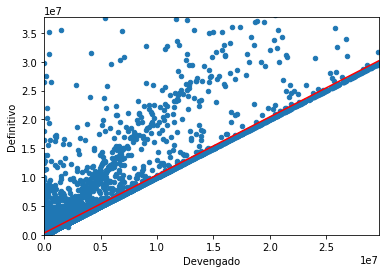

In [178]:
dispersion_graph("Devengado", "Definitivo", save_img = True, limit_quantile=0.99) # correlation: 1.0 (high)
# me choca demasiado el hecho de que abajo no haya nada
# supongo que implica que el definitivo siempre es >= devengado 
# (quizás podríamos calcular la desviación estándar de esas diferencias, como para saber cuánto mayor)
# además de eso, parecen ser relativamente lineales.
# Nótese que está limitado al cuantil 0.99 para ignorar un poco los últimos outliers

In [12]:
data[nonCategorical].corr()

,Sanción,Vigente,Definitivo,Devengado
Sanción,1.00,0.71,0.50,0.49
Vigente,0.71,1.00,0.91,0.91
Definitivo,0.50,0.91,1.00,1.00
Devengado,0.49,0.91,1.00,1.00


In [14]:
data[categoricalDesc].describe().loc[["unique", "count"]]

,Car_desc,Jur_desc,Sjur_desc,Ent_desc,Og_desc,UE_desc,Prog_desc,Sprog_desc,Proy_desc,Act_desc,ob_desc,Fin_desc,Fun_desc,Inc_desc,Ppal_desc,Par_desc,Spar_desc,Eco_desc,Fte_desc,Geo_desc
unique,2,22,29,59,59,343,510,553,791,1652,2111,5,20,7,48,171,352,22,7,16
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801


Tabla de frecuencias. 

In [38]:
for category_name in categoricalDesc:
    print(pd.value_counts(data[category_name]))
    data[category_name].count()
    print('-------------------------------------------------------------------------------------')


Administracion Central         40450
Organismos Descentralizados     8351
Name: Car_desc, dtype: int64
-------------------------------------------------------------------------------------
Ministerio De Educacion                             7636
Ministerio De Salud                                 6015
Ministerio De Ambiente Y Espacio Publico            5157
Jefatura De Gabinete De Ministros                   4727
Ministerio De Justicia Y Seguridad                  4502
Jefatura De Gobierno                                4424
Ministerio De Desarrollo Urbano Y Transporte        2906
Ministerio De Hacienda                              2793
Min.Hàbitat Y Des. Humano                           2726
Ministerio De Cultura                               2370
Min.Modern.Innovacion Y Tecnologia                  1791
Ministerio De Gobierno                              1363
Ministerio Publico                                   644
Procuracion General  De La Ciudad                    373
Consejo De La

Porcentaje datos faltantes

In [3]:
#for category_name in categorical:
for category_name in categoricalIds:
    print(data.loc[data[category_name].isnull(), category_name].count())
#print(data.loc[data['Definitivo'] == 0, 'Definitivo'].count())
print('-----------------')
for category_name in nonCategorical:
    print(data.loc[data[category_name]==0, category_name].count())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-----------------
12790
4081
17943
19105
